In [1]:
# ToDo LGBMの成果を評価するために、オッズ帯別の回収率を見てみる。

# 汎用ライブラリのimport
import sys
import os
import math
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 自作ライブラリのimport
if os.environ['BR_HOME']+"/boatrace" not in sys.path:
    sys.path.append(os.environ['BR_HOME']+"/boatrace")
#print(sys.path)

from setup.myUtil import dbHandler

In [3]:
# 分析期間の指定は一旦ここでまとめてみる。
analyzeStartDate="20180101"
analyzeEndDate="20190131"

In [4]:
dbh=dbHandler.getDBHandle()

In [5]:
# 疎通
raceDate_t = "20180101"
with dbh.cursor() as cursor:
    sel_sql = "SELECT raceId FROM racemanagement \
               WHERE raceDate='%s' and racebeforeinfo_flg = TRUE" \
                % (raceDate_t)
    cursor.execute(sel_sql)
    raceIdList=cursor.fetchall()
    print(raceIdList[0]['raceId'])

20180101-06-01


In [6]:
# オッズ帯は対数分布から作る。何段階にするかを指定する
oddsRankNum = 31
maxOddsVal = 9999
logMaxOddsVal=math.log(maxOddsVal)
oddsRankList=[]
for i in range(oddsRankNum):
    print( math.exp(logMaxOddsVal/oddsRankNum*i) )
    oddsRankList.append(math.exp(logMaxOddsVal/oddsRankNum*i))

1.0
1.3459559821377662
1.8115975058524387
2.4383305002279467
3.2818855232107764
4.417273452656877
5.945455628341869
8.002321569501389
10.770772587460472
14.496985796337892
19.51230475554721
26.26270331102395
35.34844262858201
47.57744781519357
64.03715050170716
86.19118579682926
116.00954213078997
156.14373721599992
210.1625971792226
282.8696048949842
380.7300368733502
512.4458707092183
689.7295852028684
928.3456612612006
1249.512396266154
1681.7886845097246
2263.6135406074673
3046.724186228672
4100.7566443782935
5519.437936792159
7428.920509063541


In [7]:
# オッズの分布
oddsRank_sql = ""
for i in range(oddsRankNum-1):
    oddsRank_sql += "count(CASE WHEN o.odds between %f and %f THEN 1 END ) rank%d ," % (oddsRankList[i],oddsRankList[i+1],i+1)
oddsRank_sql += "count(CASE WHEN o.odds > %f THEN 1 END ) rank%d " %(oddsRankList[oddsRankNum-1],oddsRankNum)
sel_sql = "select " + oddsRank_sql +"from raceodds o , racemanagement m \
           where o.raceId = m.raceId \
           and o.oddsType = '3t' \
           and m.raceDate between '%s' and '%s'"\
           % (analyzeStartDate,analyzeEndDate)
print(sel_sql)

with dbh.cursor() as cursor:
    cursor.execute(sel_sql)
    odds_dist=cursor.fetchall()[0]
print(odds_dist)

select count(CASE WHEN o.odds between 1.000000 and 1.345956 THEN 1 END ) rank1 ,count(CASE WHEN o.odds between 1.345956 and 1.811598 THEN 1 END ) rank2 ,count(CASE WHEN o.odds between 1.811598 and 2.438331 THEN 1 END ) rank3 ,count(CASE WHEN o.odds between 2.438331 and 3.281886 THEN 1 END ) rank4 ,count(CASE WHEN o.odds between 3.281886 and 4.417273 THEN 1 END ) rank5 ,count(CASE WHEN o.odds between 4.417273 and 5.945456 THEN 1 END ) rank6 ,count(CASE WHEN o.odds between 5.945456 and 8.002322 THEN 1 END ) rank7 ,count(CASE WHEN o.odds between 8.002322 and 10.770773 THEN 1 END ) rank8 ,count(CASE WHEN o.odds between 10.770773 and 14.496986 THEN 1 END ) rank9 ,count(CASE WHEN o.odds between 14.496986 and 19.512305 THEN 1 END ) rank10 ,count(CASE WHEN o.odds between 19.512305 and 26.262703 THEN 1 END ) rank11 ,count(CASE WHEN o.odds between 26.262703 and 35.348443 THEN 1 END ) rank12 ,count(CASE WHEN o.odds between 35.348443 and 47.577448 THEN 1 END ) rank13 ,count(CASE WHEN o.odds betwee

In [8]:
# 回収金額の分布
returnRank_sql = ""
for i in range(oddsRankNum-1):
    returnRank_sql += "sum(CASE WHEN odds between %f and %f THEN odds*100 END ) rank%d ," % (oddsRankList[i],oddsRankList[i+1],i+1)
returnRank_sql += "sum(CASE WHEN odds > %f THEN odds*100 END ) rank%d " %(oddsRankList[oddsRankNum-1],oddsRankNum)
sel_sql = "select " + returnRank_sql +"from raceresultsummary_v \
           where raceDate between '%s' and '%s'"\
           % (analyzeStartDate,analyzeEndDate)
print(sel_sql)

with dbh.cursor() as cursor:
    cursor.execute(sel_sql)
    return_dist=cursor.fetchall()[0]
print(return_dist)



select sum(CASE WHEN odds between 1.000000 and 1.345956 THEN odds*100 END ) rank1 ,sum(CASE WHEN odds between 1.345956 and 1.811598 THEN odds*100 END ) rank2 ,sum(CASE WHEN odds between 1.811598 and 2.438331 THEN odds*100 END ) rank3 ,sum(CASE WHEN odds between 2.438331 and 3.281886 THEN odds*100 END ) rank4 ,sum(CASE WHEN odds between 3.281886 and 4.417273 THEN odds*100 END ) rank5 ,sum(CASE WHEN odds between 4.417273 and 5.945456 THEN odds*100 END ) rank6 ,sum(CASE WHEN odds between 5.945456 and 8.002322 THEN odds*100 END ) rank7 ,sum(CASE WHEN odds between 8.002322 and 10.770773 THEN odds*100 END ) rank8 ,sum(CASE WHEN odds between 10.770773 and 14.496986 THEN odds*100 END ) rank9 ,sum(CASE WHEN odds between 14.496986 and 19.512305 THEN odds*100 END ) rank10 ,sum(CASE WHEN odds between 19.512305 and 26.262703 THEN odds*100 END ) rank11 ,sum(CASE WHEN odds between 26.262703 and 35.348443 THEN odds*100 END ) rank12 ,sum(CASE WHEN odds between 35.348443 and 47.577448 THEN odds*100 END 

[0, 0, 60.0, 91.8213058419244, 80.73705179282868, 80.26517000162681, 79.62988518436741, 78.81826848080424, 77.18263802482339, 76.59649791472738, 75.51157001183529, 76.3204573533073, 75.27796365193652, 73.13074225336761, 73.35592195414223, 74.0256156854586, 73.67165160950793, 72.18507781780322, 68.95018142772511, 65.95353103571111, 65.80677466758983, 59.12024026210411, 52.586866824168936, 45.40717758657939, 43.00900759243452, 40.91965504087836, 24.988011339148592, 38.848016027603094, 34.91539000700911, 90.56852271895808, 0]


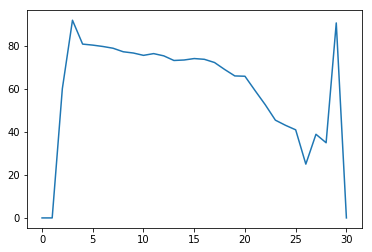

In [9]:
# 回収率を見る
# 10倍未満の本命周辺で回収率は78%～81%くらい。これを安定的に超えられれば、一応有効といえる。
kaishuRank=[]
oddsNum_dist=[]
for r in odds_dist.keys():
    if odds_dist[r] == None:
        oddsNum_dist.append(0)
    else:
        oddsNum_dist.append(odds_dist[r])
    if return_dist[r] == None or odds_dist[r]== None:
        kaishuRank.append(0)
    else:
        kaishuRank.append(return_dist[r]/odds_dist[r])
plt.plot(kaishuRank)

print(kaishuRank)


In [11]:
# メモリ使用チェック
print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_") and sys.getsizeof(eval(var_name)) > 1000: #ここだけアレンジ
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

|            Variable Name|    Memory|
 ------------------------------------ 
|             oddsRank_sql|      2404|
|                odds_dist|      1184|
|               raceIdList|      1448|
|           returnRank_sql|      2497|
|              return_dist|      1184|
|                  sel_sql|      2588|
